<a href="https://colab.research.google.com/github/himanshuchrist/ML/blob/ML_Lab/Lab1_2348520.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
#Importing the data
data=pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Checking for NULL values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
#Dropping unrelevant columns
data=data.drop(columns='CustomerId', axis=1)
data=data.drop(columns='Surname', axis=1)
data=data.drop(columns='RowNumber', axis=1)

<Axes: >

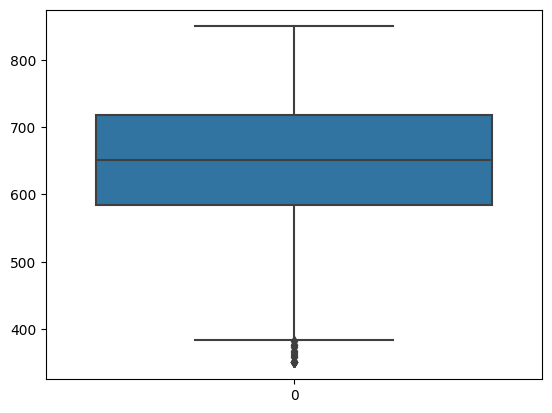

In [ ]:
#Plot numerical data and check for outliers
sns.boxplot(data['CreditScore'])

In [ ]:
#Checking for Quartile Values
data['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [ ]:
#Finding the number of ouliers
b = np.where(data['CreditScore']>718) or (data['CreditScore']<584)
a = np.array(b[0])
len(a)

2463

Since Outliers are nearly 25% consider Z-Score

In [ ]:
#Defining function to find outliers and drop them from the data
def drop_outlier(data,col_name):
  print(data.shape)
  z = np.abs(stats.zscore(col_name))
  data.drop(data.index[np.where(abs(z)>2.5)],inplace=True)
  print("New data shape post deletion: "+str(data.shape))

In [ ]:
#Removing ouliers based on credit score
drop_outlier(data,data['CreditScore'])

(10000, 11)
New data shape post deletion: (9974, 11)


(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

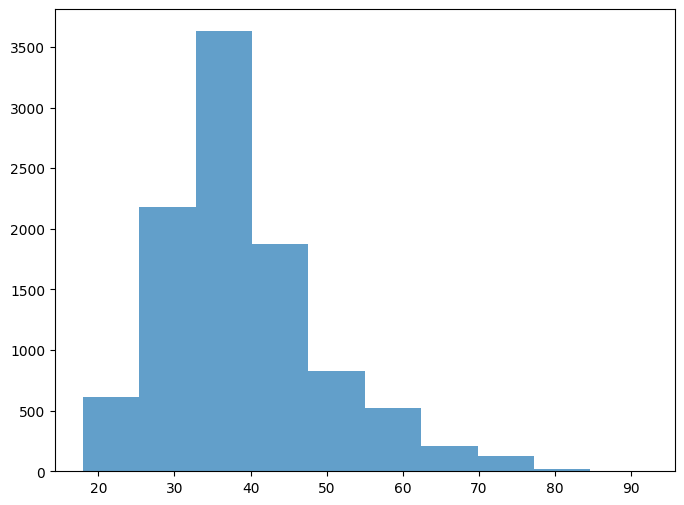

In [5]:
#Age without binning
plt.figure(figsize=(8,6))
plt.hist(data['Age'],alpha=0.7)

<Axes: >

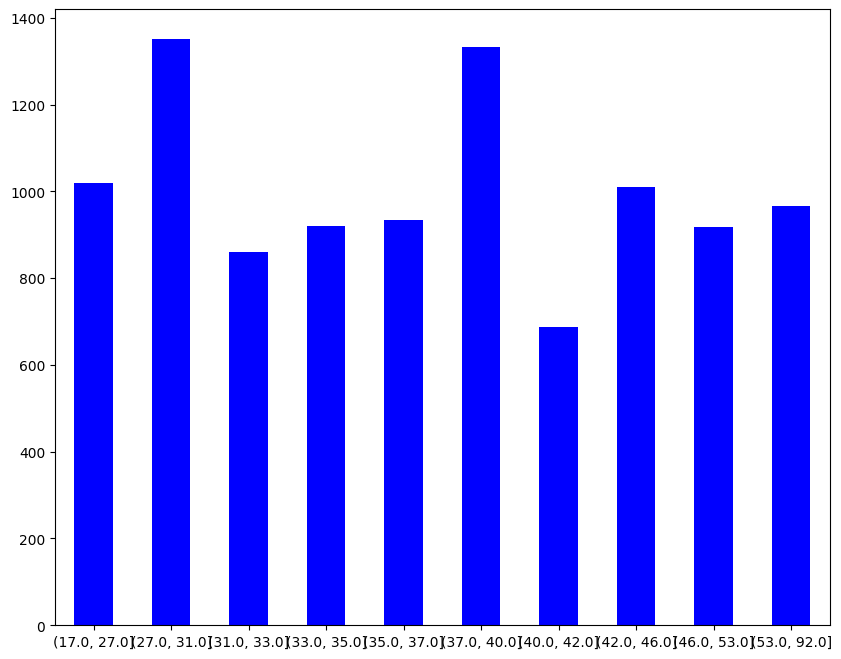

In [6]:
#Dividing age into 10 bins
data['bin'] = pd.qcut(data['Age'], q=10, precision=0)
data['bin'].value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(10,8))

In [ ]:
#Assigning nominal data to numeric values
from sklearn.preprocessing import LabelEncoder
for col in ['Geography','Gender']:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Finding Correlation between variables
data.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

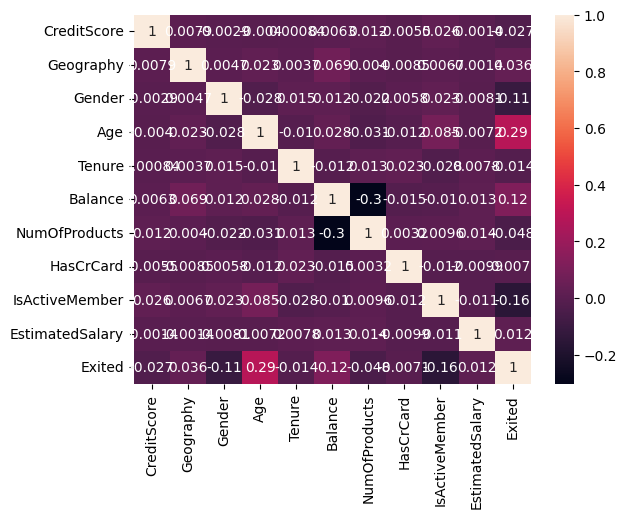

In [ ]:
#Plotting the same on heat map
sns.heatmap(data.corr(),annot=True)

In [ ]:
#Checking relations between variables and customer churn using chi-square and plotting the same
from sklearn.feature_selection import chi2
X=data.drop(columns=['Exited'])
Y=data['Exited']

<Axes: >

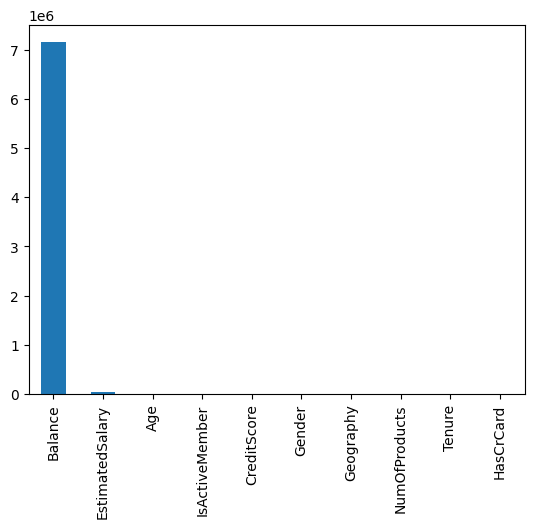

In [ ]:
chi_scores=chi2(X,Y)
chi_values=pd.Series(chi_scores[0],index=X.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

<Axes: >

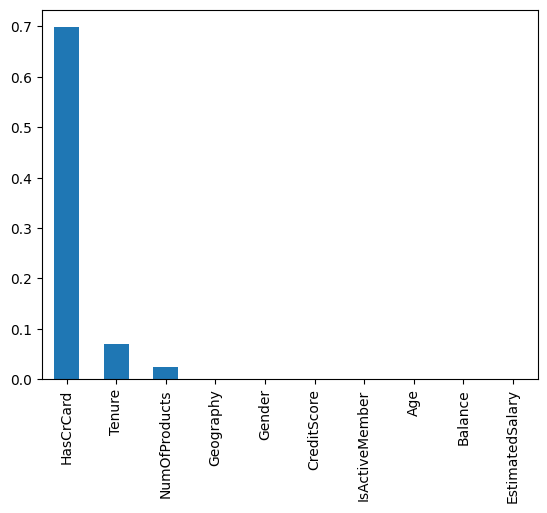

In [ ]:
#Finding least affecting variables
p_values=pd.Series(chi_scores[1],index=X.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values.plot.bar()

In [ ]:
#Standardizing numerical data
required=['CreditScore','Age','Tenure','Balance','EstimatedSalary']
sc = StandardScaler()
data[required] = sc.fit_transform(data[required])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,0.198164,-1.387538,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,0.293517,1.032908,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0


In [ ]:
#Applying PCA- into 8 components
columns=data[['HasCrCard', 'IsActiveMember', 'Geography', 'NumOfProducts', 'Gender','Tenure','CreditScore','Age','Balance','EstimatedSalary']]
X=columns
pca = PCA(n_components=8)
np.ascontiguousarray(pca.fit_transform(X))
pca.explained_variance_ratio_

array([0.15962264, 0.15049824, 0.14882314, 0.14730231, 0.14542149,
       0.10051238, 0.04360832, 0.037691  ])

In [ ]:
#Applying PCA- into 5 components
pca = PCA(n_components=5)
np.ascontiguousarray(pca.fit_transform(X))
pca.explained_variance_ratio_

array([0.15962264, 0.15049824, 0.14882314, 0.14730231, 0.14542149])

In [ ]:
#Applying PCA- into 3 components
pca = PCA(n_components=3)
np.ascontiguousarray(pca.fit_transform(X))
pca.explained_variance_ratio_

array([0.15962264, 0.15049824, 0.14882314])